**Nguyễn Tiến Anh - B20DCCN005**

**Bài 5: Natural Language Processing**

# 5.1

**a. Tìm hiểu**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_val = x_val / 255.0

# Xây dựng mô hình
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Trong Keras, một trong số những thư viện phổ biến cho việc xây dựng và huấn luyện mô hình máy học, có thể theo dõi quá tình học của mô hình bằng cách sử dụng các công cụ và giao diện mà thư viện cung cấp sẵn. Điển hình là các thư viện dưới đây:

1. **Callbacks**: Keras cung cấp các hàm (callbacks) được gọi trong quá trình huấn luyện mô hình để thực hiện các tác vụ như: lưu lại trọng số của mô hình, dừng quá trình huấn luyện khi đạt được điều kiện mong muốn, giảm learning rate khi mô hình không cải thiện được nữa, ... Một trong những callback phổ biến nhất là ModelCheckpoint, cho phép lưu lại trọng số của mô hình ở mức tốt nhất dựa trên một số tiêu chí (validation loss, validation accuracy, ...) sau mỗi epoch huấn luyện.

In [7]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2544 - accuracy: 0.9273 - val_loss: 0.1418 - val_accuracy: 0.9569
Epoch 2/10
  16/1875 [..............................] - ETA: 6s - loss: 0.1186 - accuracy: 0.9609

c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 7s 4ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0780 - accuracy: 0.9770 - val_loss: 0.0803 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0848 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0771 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0774 - val_accuracy: 0.9770
E

2. **TensorBoard**: TensorBoard là một công cụ quản lý và hiển thị quá trình huấn luyện mô hình TensorFlow, và Keras tích hợp với TensorBoard thông qua callback TensorBoard. Bạn có thể sử dụng nó để xem biểu đồ của loss và các metric, theo dõi quá trình học mô hình trong thời gian thực và so sánh các mô hình khác nhau.

In [8]:
tensorboard = TensorBoard(log_dir="logs")
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0886 - val_accuracy: 0.9768
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0899 - val_accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0807 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0889 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.1037 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0932 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0999 - val_accuracy:

**b. Chạy Code**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


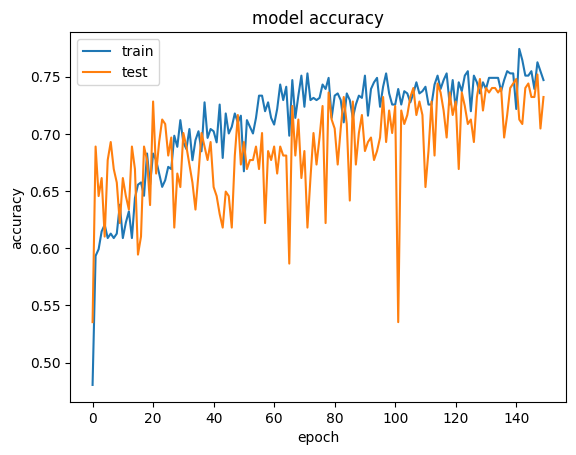

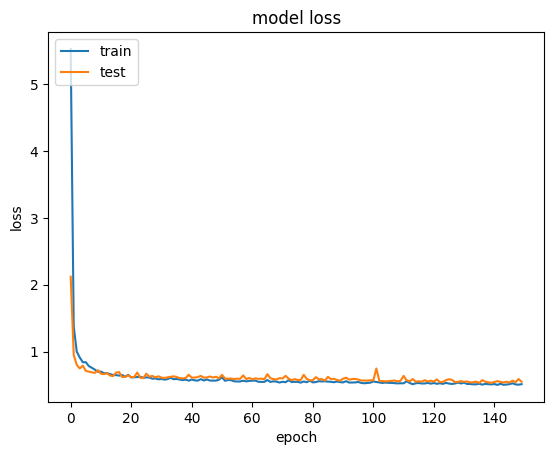

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt 
import numpy as np 
# load pima indians dataset 
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",") 
# split into input (X) and output (Y) variables 
X = dataset[:,0:8] 
Y = dataset[:,8] 
# create model 
model = Sequential() 
model.add(Dense(12, input_dim=8, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
# Compile model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0) 
# list all data in history  
print(history.history.keys()) 
# summarize history for accuracy 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()